In [9]:
from auto_shorts.most_watched_moments import MostWatchedMomentsDownloader, MostReplayedNotPresentException
import matplotlib.pyplot as plt

In [1]:
import numpy as np

In [2]:
test = [{1, 2}, {3, 5}, {5,}, {1, 6}, {1, 6}]
np.array_split(test, 2)

[array([{1, 2}, {3, 5}, {5}], dtype=object),
 array([{1, 6}, {1, 6}], dtype=object)]

In [2]:
moments_downloader = MostWatchedMomentsDownloader(video_id="3Xj9pJECk2o")
df = moments_downloader.get_most_watched_moments()

In [4]:
from datetime import datetime
test = '2022-13-20'
datetime.strptime(test, "%Y-%m-%d")

ValueError: time data '2022-13-20' does not match format '%Y-%m-%d'

In [4]:
df.head()

,time_start_ms,time_end_ms,peroid_duration_ms,intensity_score
0,0,3450,3450,1.000000
1,3450,6900,3450,0.415355
2,6900,10350,3450,0.468984
3,10350,13800,3450,0.510703
4,13800,17250,3450,0.549855


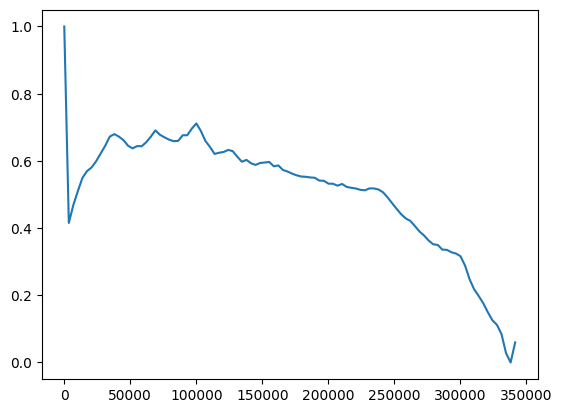

In [5]:
plt.plot(df['time_start_ms'], df['intensity_score'])

Visualizing the intensity score, it shall be noticed that no singular peak of "liked" moment can be distinguished. How people watch a video is more gradual. Extracting the highest value (other than when timestamp_start = 0) might be a good way, though it shall be analysed whether the build-up to the most watched moment is worth to be included in the short.

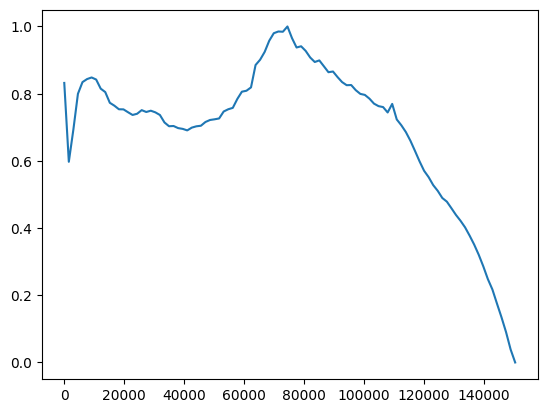

In [6]:
moments_downloader = MostWatchedMomentsDownloader(video_id="y7T3ax7JPwI")
df = moments_downloader.get_most_watched_moments()
plt.plot(df['time_start_ms'], df['intensity_score'])

This time, the peak is more distinguishable. There is the build up to the most watched moment and downward trend afterwards.

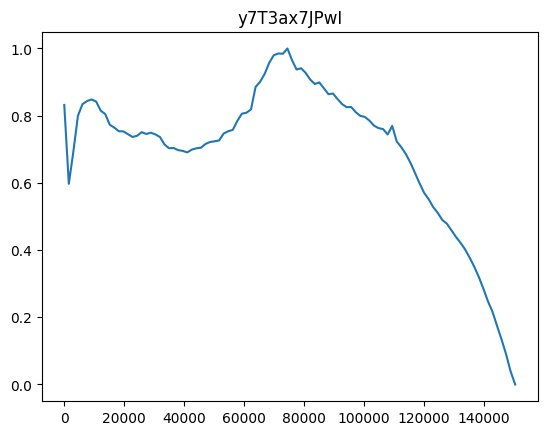

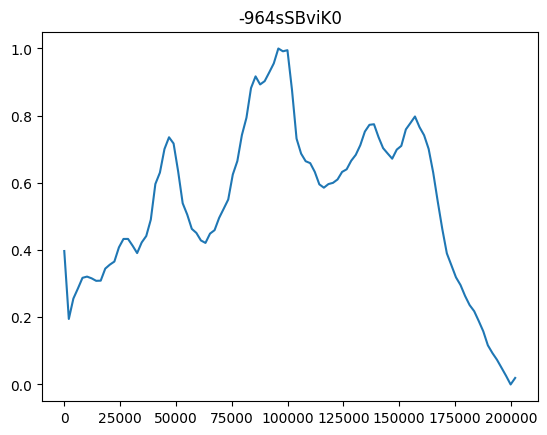

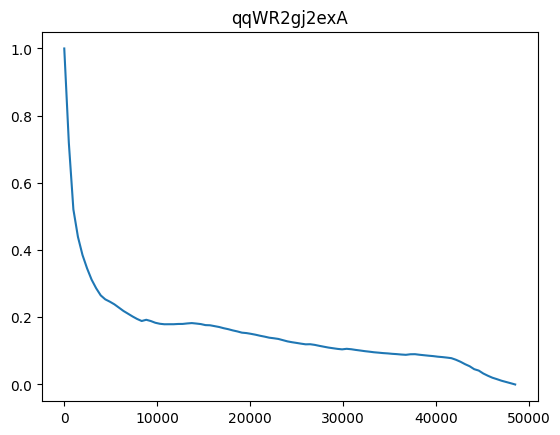

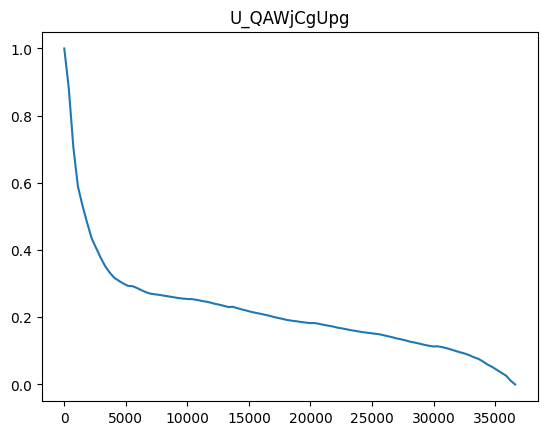

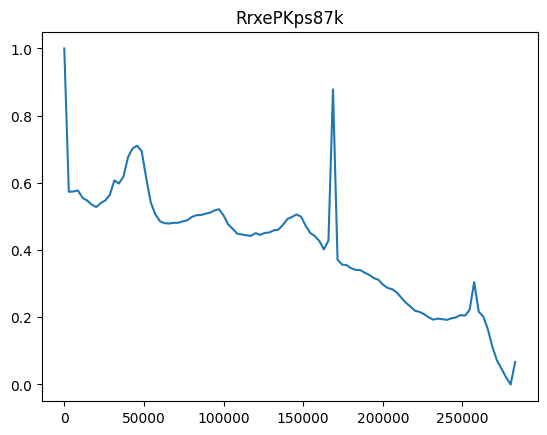

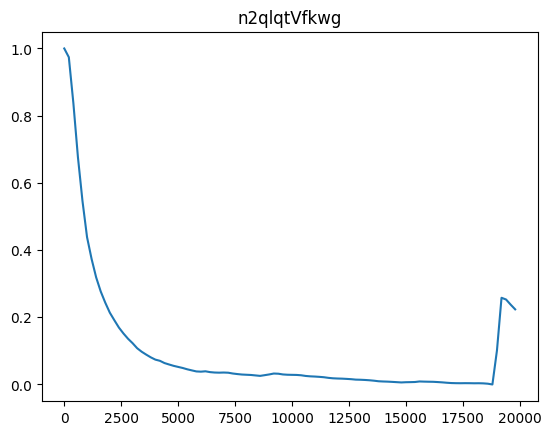

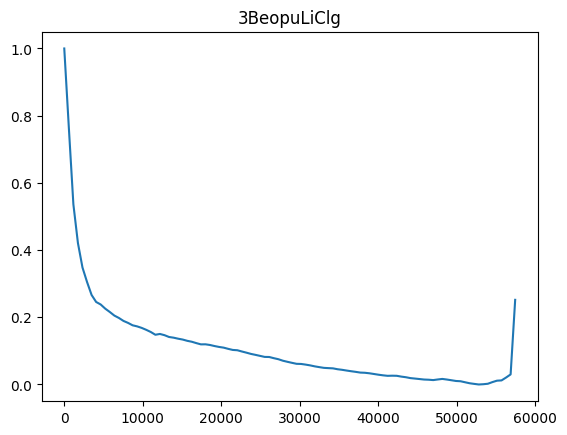

In [11]:
for vid_id in ['y7T3ax7JPwI', 'KGD2N5hJ2e0', 'jMMUgnf2E9c', '-964sSBviK0', 'qqWR2gj2exA', 'U_QAWjCgUpg', 'RrxePKps87k', 'n2qlqtVfkwg', 'V-XomaDFbcQ', '3BeopuLiClg']:
    moments_downloader = MostWatchedMomentsDownloader(video_id=vid_id)
    try:
        df = moments_downloader.get_most_watched_moments()
        plt.plot(df['time_start_ms'], df['intensity_score'])
        plt.title(vid_id)
        plt.show()
    except MostReplayedNotPresentException:
        continue

Analysing other videos, at least those which have most watched moments available, one idea of identifying the most worth moment could be at first taking into analysis [0.1, 0.9] of the length of the video.
Notes on particular videos:
- y7T3ax7JPwI : build up to the most watched moment. It can be distinguished by noting how the trend of watched moments changes
- -964sSBviK0 : 4 peaks can be noticed, similiarily, trend change can be used for the peaks
- RrxePKps87k : 1 peak at the start of the video, 1 outlier noticeable in the middle of the video

Summing up, two approaches shall be further analysed:
- trend change
- outlier analysis (particularly Additive Outlier, or the very moments that indicate Level Shifts or Temporary Change)